# <span><center>Microproyecto 2: Identificación de relaciones semánticas de los Objetivos de Desarrollo Sostenible (ODSG)</center></span>

## Equipo 16: Mateo Hernandez Gualdron - Martin Alejandro Quintero Rincon

#### Universidad de los Andes, Maestría en Inteligencia Artificial.
#### Machine Learning No Supervisado (MLNS)
______________________________________________________________________________________________________________________________________________


## Actividades para realizar:


1. Preparación de los textos utilizando el esquema de bolsa de palabras (BOW) con una pesado TF-IDF. Para este paso construir un pipeline que integre las transformaciones que se consideren adecuadas.

2. Desarrollo de un modelo de clasificación que permita relacionar un texto con un ODS. Para manejar la complejidad del espacio de entrada aplicar un algoritmo de reducción de la dimensionalidad.

3. Evaluación del modelo con textos que no hayan sido utilizados para el aprendizaje.


## Criterios de aceptación

- Preparación de los datos, incluyendo la reducción de la dimensionalidad, justificando las decisiones tomadas.


- Construcción del pipeline de preparación de datos.



- Construcción del modelo de clasificación con el algoritmo seleccionado con búsqueda de hiperparámetros, validándolo con medidas de evaluación adecuadas. Se justifica la selección del algoritmo y las métricas empleadas. Se emplea un método de reducción de la dimensionalidad.


- Evidencia del desempeño del método construido mostrando las clasificaciones sobre un conjunto de textos que no hayan sido utilizados durante el aprendizaje

### -------------------------------------------------------------------------------------------------------------------------------------------------------

## Entendimiento

Los ODS son un compendio de objetivos para acabar con la pobreza, protejer al planeta y mejorar la vida de las personas en todo el planeta para el año 2030. Todos los objetivos fueron adoptados por los Estados Miembros de las Naciones Unidas para Septiembre del 2015 como parte del ejercicio 70 de la Asamblea General de las Naciones Unidas.

El [sitio web](https://osdg.ai/osdg?token=87f8vbKPfvB4F8Tjh&type=text&outcome=successful) de la iniciativa supranacional aclara que son 17 los objetivos de desarrollo sostenible:

- [Objetivo 1](https://sdgs.un.org/goals/goal1): No Poverty

- [Objetivo 2](https://sdgs.un.org/goals/goal2):  Zero Hunger

- [Objetivo 3](https://sdgs.un.org/goals/goal3):  Good health and Well-Being

- [Objetivo 4](https://sdgs.un.org/goals/goal4):  Quality Education

- [Objetivo 5](https://sdgs.un.org/goals/goal5):  Gender Equality

- [Objetivo 6](https://sdgs.un.org/goals/goal6):  Clean Water and Sanitation

- [Objetivo 7](https://sdgs.un.org/goals/goal7): Affordable and Clean Energy

- [Objetivo 8](https://sdgs.un.org/goals/goal8): Decent Work and Economic Growth

- [Objetivo 9](https://sdgs.un.org/goals/goal9): Industry, Innovation and Infrastructure

- [Objetivo 10](https://sdgs.un.org/goals/goal10): Reduced inequalities

- [Objetivo 11](https://sdgs.un.org/goals/goal11): Sustainable Cities and Communities

- [Objetivo 12](https://sdgs.un.org/goals/goal12): Responsible Consumptiond and Production

- [Objetivo 13](https://sdgs.un.org/goals/goal13): Climate Action

- [Objetivo 14](https://sdgs.un.org/goals/goal14): Life Below Water

- [Objetivo 15](https://sdgs.un.org/goals/goal15): Life on Land

- [Objetivo 16](https://sdgs.un.org/goals/goal16): Peace, Justice and Strong Institutions

- [Objetivo 17](https://sdgs.un.org/goals/goal17): Partnership for the Goals

Cada objetivo en su página web contiene un resumen con el reporte THESDGREPORT2025

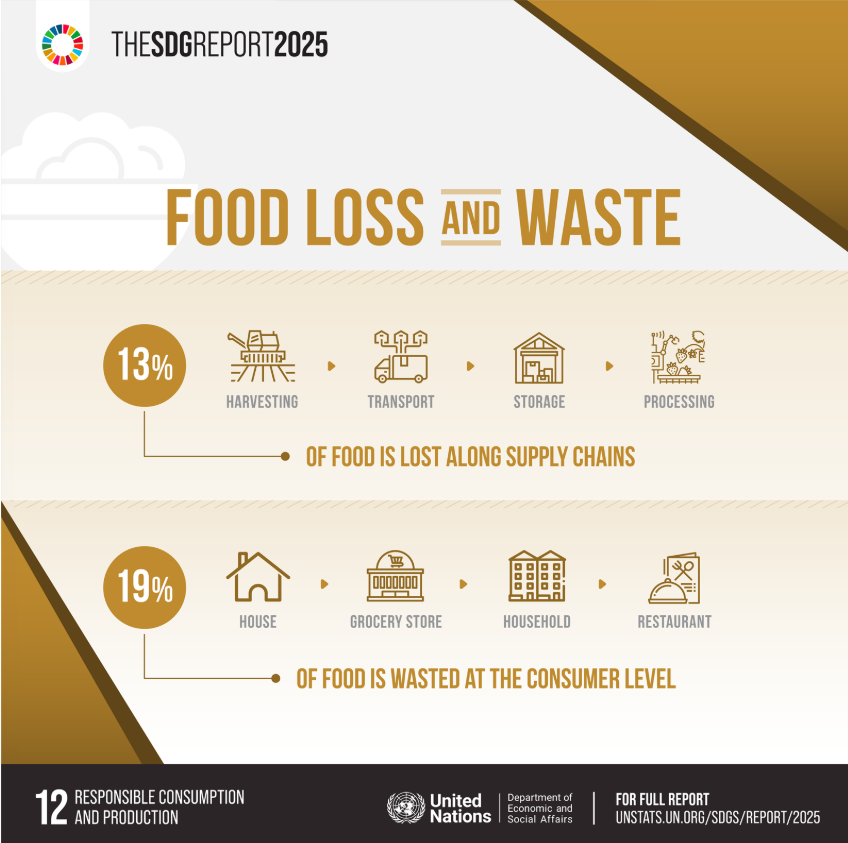

Así como eventos asociados al mismo, publicaciones, noticias y tópicos relacionados.



In [3]:
import pandas as pd
data_raw = pd.read_excel('Train_textosODS.xlsx')
data_raw

,textos,ODS
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,No dejar clara la naturaleza de estos riesgos ...,6
2,"Como resultado, un mayor y mejorado acceso al ...",13
3,Con el Congreso firmemente en control de la ju...,16
4,"Luego, dos secciones finales analizan las impl...",5
...,...,...
9651,Esto implica que el tiempo de las mujeres en e...,5
9652,"Sin embargo, estas fallas del mercado implican...",3
9653,El hecho de hacerlo y cómo hacerlo dependerá e...,9
9654,"Esto se destacó en el primer estudio de caso, ...",6


In [4]:
data_raw.shape

(9656, 2)

In [5]:
# Nulos
data_raw.isnull().sum()

textos    0
ODS       0
dtype: int64

In [6]:
# Duplicados
data_raw.duplicated().sum()

np.int64(0)

In [7]:
data_raw['ODS'].value_counts()

ODS
16    1080
5     1070
4     1025
3      894
7      787
6      695
11     607
1      505
13     464
8      446
14     377
2      369
10     352
9      343
15     330
12     312
Name: count, dtype: int64

El dataset contiene 9656 textos (filas) en la columna textos acerca de los primeros 16 ODS, etiquetados en la columna ODS, con lo cual no contiene información acerca del ODS # 17 correspondiente a [Partnership for the Goal and Sustainable Development](https://sdgs.un.org/goals/goal17).

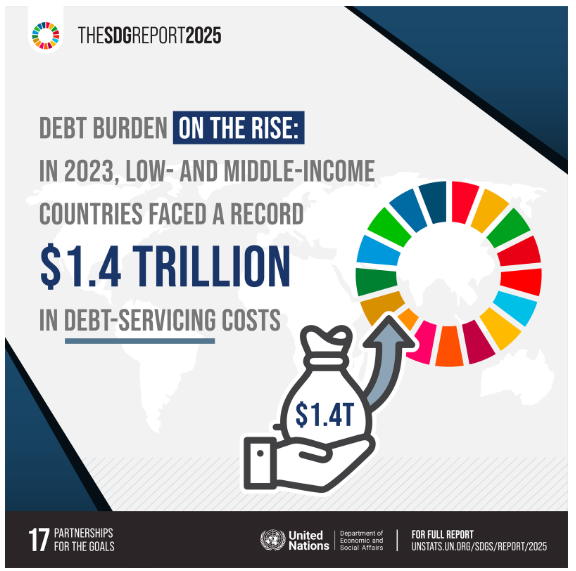

*No hay duplicados ni valores nulos*

In [8]:
# Validación para el ODS 17
ods17 = data_raw[data_raw['ODS']==17]
ods17

,textos,ODS


## Preprocessing

Debido a que se usará, en lugar de un embedding construido, una matriz de vectores propia con BOW y TF-IDF para construir la representación del dataset es necesario hacer:

1. **Tokenización**: Para poder definir la unidad mínima del texto
2. **StopWords**: Para no añadir a la matriz de vectores palabras vacías
3. **Stemming / Lemmatización**: Para dejar la raíz de la palabra en lugar de varias redundantes al mismo significado

In [12]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt_tab to /Users/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data = data_raw.copy()
tokenized = data['textos'].apply(lambda x: word_tokenize(x.lower()))
tokenized

0       [``, aprendizaje, '', y, ``, educación, '', se...
1       [no, dejar, clara, la, naturaleza, de, estos, ...
2       [como, resultado, ,, un, mayor, y, mejorado, a...
3       [con, el, congreso, firmemente, en, control, d...
4       [luego, ,, dos, secciones, finales, analizan, ...
                              ...                        
9651    [esto, implica, que, el, tiempo, de, las, muje...
9652    [sin, embargo, ,, estas, fallas, del, mercado,...
9653    [el, hecho, de, hacerlo, y, cómo, hacerlo, dep...
9654    [esto, se, destacó, en, el, primer, estudio, d...
9655    [aunque, existen, programas, para, convertirse...
Name: textos, Length: 9656, dtype: object

#### Ejemplo del texto tokenizado

In [14]:
tokenized.iloc[77]

['guiará',
 'la',
 'revisión',
 'de',
 'la',
 'planificación',
 'presupuestaria',
 'plurianual',
 'del',
 'gobierno',
 'federal',
 'para',
 'el',
 'próximo',
 'ciclo',
 ',',
 '2016-2019.',
 'además',
 ',',
 'como',
 'elemento',
 'crucial',
 'para',
 'permitir',
 'los',
 'esfuerzos',
 'continuos',
 'hacia',
 'la',
 'implementación',
 'de',
 'la',
 'epanb',
 'y',
 'el',
 'logro',
 'de',
 'las',
 'metas',
 'de',
 'biodiversidad',
 'nacionales',
 'y',
 'de',
 'aichi',
 ',',
 'se',
 'está',
 'diseñando',
 'una',
 'estrategia',
 'nacional',
 'para',
 'la',
 'movilización',
 'de',
 'recursos',
 'y',
 'para',
 'satisfacer',
 'las',
 'necesidades',
 'de',
 'capacidad',
 '.',
 'además',
 ',',
 'el',
 'mma',
 'negoció',
 'con',
 'el',
 'instituto',
 'de',
 'investigación',
 'económica',
 'aplicada',
 '(',
 'ipea',
 ')',
 'el',
 'mapeo',
 'nacional',
 'de',
 'los',
 'recursos',
 'invertidos',
 'en',
 'biodiversidad',
 'en',
 'brasil',
 'a',
 'través',
 'de',
 'la',
 'metodología',
 'de',
 'clasifi

Contiene palabras tales como: ['la','los','y/o','además'] así como signos de puntuación [,.;:...] para ello se utiliza la función RegexpTokenizer que combina además del tokenizador un RegularExpression que es posible añadir y modificar para que solo incluya letras.

Debido a la complejidad del español se incluye un patrón robusto de RegEx capaz de encontrar:

- Letras (incluyendo ñ, tildes, diéresis y mayúsculas acentuadas)
- Números
- Palabras con guiones y apóstrofes internos
- Números con decimales o separador de miles

#### Stop-Words

In [15]:
patron = r"[A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+(?:[-'][A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+)*|\d+(?:[\.,]\d+)*"
test_frase = "El niño comió SÚPER rápido; mañana será el día 2.500, SUPERÁVIT de chigüiros-pingüinos, ¡increíble! también \'d\'Alessandro\' y ex-presidente."
tokenizer = RegexpTokenizer(patron)
frase_tokenizada = tokenizer.tokenize(test_frase)
frase_tokenizada

['El',
 'niño',
 'comió',
 'SÚPER',
 'rápido',
 'mañana',
 'será',
 'el',
 'día',
 '2.500',
 'SUPERÁVIT',
 'de',
 'chigüiros-pingüinos',
 'increíble',
 'también',
 "d'Alessandro",
 'y',
 'ex-presidente']

In [16]:
patron = r"[A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+(?:[-'][A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+)*|\d+(?:[\.,]\d+)*"
tokenizer = RegexpTokenizer(patron)
tokenized_no_punct = data["textos"].apply(lambda x: tokenizer.tokenize(x.lower()))
tokenized_no_punct

0       [aprendizaje, y, educación, se, consideran, si...
1       [no, dejar, clara, la, naturaleza, de, estos, ...
2       [como, resultado, un, mayor, y, mejorado, acce...
3       [con, el, congreso, firmemente, en, control, d...
4       [luego, dos, secciones, finales, analizan, las...
                              ...                        
9651    [esto, implica, que, el, tiempo, de, las, muje...
9652    [sin, embargo, estas, fallas, del, mercado, im...
9653    [el, hecho, de, hacerlo, y, cómo, hacerlo, dep...
9654    [esto, se, destacó, en, el, primer, estudio, d...
9655    [aunque, existen, programas, para, convertirse...
Name: textos, Length: 9656, dtype: object

In [17]:
tokenized_no_punct.iloc[77]

['guiará',
 'la',
 'revisión',
 'de',
 'la',
 'planificación',
 'presupuestaria',
 'plurianual',
 'del',
 'gobierno',
 'federal',
 'para',
 'el',
 'próximo',
 'ciclo',
 '2016',
 '2019',
 'además',
 'como',
 'elemento',
 'crucial',
 'para',
 'permitir',
 'los',
 'esfuerzos',
 'continuos',
 'hacia',
 'la',
 'implementación',
 'de',
 'la',
 'epanb',
 'y',
 'el',
 'logro',
 'de',
 'las',
 'metas',
 'de',
 'biodiversidad',
 'nacionales',
 'y',
 'de',
 'aichi',
 'se',
 'está',
 'diseñando',
 'una',
 'estrategia',
 'nacional',
 'para',
 'la',
 'movilización',
 'de',
 'recursos',
 'y',
 'para',
 'satisfacer',
 'las',
 'necesidades',
 'de',
 'capacidad',
 'además',
 'el',
 'mma',
 'negoció',
 'con',
 'el',
 'instituto',
 'de',
 'investigación',
 'económica',
 'aplicada',
 'ipea',
 'el',
 'mapeo',
 'nacional',
 'de',
 'los',
 'recursos',
 'invertidos',
 'en',
 'biodiversidad',
 'en',
 'brasil',
 'a',
 'través',
 'de',
 'la',
 'metodología',
 'de',
 'clasificación',
 'de',
 'actividades',
 'ambie

In [18]:
nltk_stopwords = stopwords.words("spanish")
no_stopwords = tokenized_no_punct.apply(lambda x: [token for token in x if token not in nltk_stopwords])
no_stopwords

0       [aprendizaje, educación, consideran, sinónimos...
1       [dejar, clara, naturaleza, riesgos, puede, dar...
2       [resultado, mayor, mejorado, acceso, agua, pue...
3       [congreso, firmemente, control, jurisdicción, ...
4       [luego, dos, secciones, finales, analizan, imp...
                              ...                        
9651    [implica, tiempo, mujeres, mercado, laboral, v...
9652    [embargo, fallas, mercado, implican, competenc...
9653    [hecho, hacerlo, cómo, hacerlo, dependerá, gra...
9654    [destacó, primer, estudio, caso, marco, instit...
9655    [aunque, existen, programas, convertirse, espe...
Name: textos, Length: 9656, dtype: object

In [19]:
no_stopwords.iloc[77]

['guiará',
 'revisión',
 'planificación',
 'presupuestaria',
 'plurianual',
 'gobierno',
 'federal',
 'próximo',
 'ciclo',
 '2016',
 '2019',
 'además',
 'elemento',
 'crucial',
 'permitir',
 'esfuerzos',
 'continuos',
 'hacia',
 'implementación',
 'epanb',
 'logro',
 'metas',
 'biodiversidad',
 'nacionales',
 'aichi',
 'diseñando',
 'estrategia',
 'nacional',
 'movilización',
 'recursos',
 'satisfacer',
 'necesidades',
 'capacidad',
 'además',
 'mma',
 'negoció',
 'instituto',
 'investigación',
 'económica',
 'aplicada',
 'ipea',
 'mapeo',
 'nacional',
 'recursos',
 'invertidos',
 'biodiversidad',
 'brasil',
 'través',
 'metodología',
 'clasificación',
 'actividades',
 'ambientales',
 'cea',
 'desarrollada',
 'onu',
 'bajo',
 'sistema',
 'cuentas',
 'económicas',
 'ambientales',
 'seea',
 'análisis',
 'debe',
 'contribuir',
 'mejor',
 'comprensión',
 'gestión',
 'operación',
 'políticas',
 'ambientales',
 'nacionales',
 'puede',
 'respaldar',
 'análisis',
 'políticas',
 'públicas',
 's

#### Lemmatización / Stemmización
Se selecciona la Stemmización

In [20]:
stemmer = SnowballStemmer("spanish")
stemmed = no_stopwords.apply(lambda x: [stemmer.stem(token) for token in x])
stemmed.iloc[77]
print("Stemmed:", stemmed.iloc[77])

Stemmed: ['gui', 'revision', 'planif', 'presupuestari', 'plurianual', 'gobiern', 'federal', 'proxim', 'cicl', '2016', '2019', 'ademas', 'element', 'crucial', 'permit', 'esfuerz', 'continu', 'haci', 'implement', 'epanb', 'logr', 'met', 'biodivers', 'nacional', 'aichi', 'diseñ', 'estrategi', 'nacional', 'moviliz', 'recurs', 'satisfac', 'neces', 'capac', 'ademas', 'mma', 'negoc', 'institut', 'investig', 'econom', 'aplic', 'ipe', 'mape', 'nacional', 'recurs', 'invert', 'biodivers', 'brasil', 'traves', 'metodolog', 'clasif', 'activ', 'ambiental', 'cea', 'desarroll', 'onu', 'baj', 'sistem', 'cuent', 'econom', 'ambiental', 'see', 'analisis', 'deb', 'contribu', 'mejor', 'comprension', 'gestion', 'oper', 'polit', 'ambiental', 'nacional', 'pued', 'respald', 'analisis', 'polit', 'public', 'suger', 'ajust', 'implement', 'planific', 'accion', 'futur']


### Comparación de los estados

In [21]:
inicial = data['textos'].iloc[77][:108]
tokenizada_sin_puntuacion = tokenized_no_punct.iloc[77][:15]
sin_stopwords = no_stopwords.iloc[77][0:15]
stemmed = stemmed.iloc[77][0:15]
frase = {'inicial': inicial, 'tokenizada_sin_puntuacion': tokenizada_sin_puntuacion, 'sin_stopwords': sin_stopwords,'stemmed': stemmed}
frase 

{'inicial': 'Guiará la revisión de la planificación presupuestaria plurianual del Gobierno Federal para el próximo ciclo,',
 'tokenizada_sin_puntuacion': ['guiará',
  'la',
  'revisión',
  'de',
  'la',
  'planificación',
  'presupuestaria',
  'plurianual',
  'del',
  'gobierno',
  'federal',
  'para',
  'el',
  'próximo',
  'ciclo'],
 'sin_stopwords': ['guiará',
  'revisión',
  'planificación',
  'presupuestaria',
  'plurianual',
  'gobierno',
  'federal',
  'próximo',
  'ciclo',
  '2016',
  '2019',
  'además',
  'elemento',
  'crucial',
  'permitir'],
 'stemmed': ['gui',
  'revision',
  'planif',
  'presupuestari',
  'plurianual',
  'gobiern',
  'federal',
  'proxim',
  'cicl',
  '2016',
  '2019',
  'ademas',
  'element',
  'crucial',
  'permit']}

# PipeLine de procesamiento
Una vez testeados los procesos se hace un Pipeline que contenga todos los pasos

In [46]:
from sklearn.pipeline import Pipeline
#------------ Función unificadora
def preprocesar(texto):
    from nltk import RegexpTokenizer
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords
    
    tokenizer = RegexpTokenizer(r'\w+')
    stemmer = SnowballStemmer('spanish')
    
    texto = str(texto).lower()
    tokens = tokenizer.tokenize(texto)
    tokens = [word for word in tokens if word not in stopwords.words('spanish') and len(word) > 2]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

## Text_split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['textos'], data['ODS'], test_size=0.2, random_state=77)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7724,), (1932,), (7724,), (1932,))

In [48]:
y_train.value_counts()

ODS
5     879
16    876
4     792
3     719
7     612
6     558
11    509
1     400
13    367
8     357
14    308
2     296
10    275
15    273
9     271
12    232
Name: count, dtype: int64

In [49]:
y_test.value_counts()

ODS
4     233
16    204
5     191
3     175
7     175
6     137
1     105
11     98
13     97
8      89
12     80
10     77
2      73
9      72
14     69
15     57
Name: count, dtype: int64

## BOW usando TF-IDF

In [50]:
vectorizador = TfidfVectorizer(preprocessor=preprocesar)

## Reducción de dimensionalidad

In [60]:
tsvd = TruncatedSVD(n_components=250, random_state=77)

## Modelo

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
modelo = SVC()

## Pipeline Completo

In [54]:
steps = [('vectorizador', vectorizador), ('tsvd', tsvd), ('model', modelo)]
pipeline = Pipeline(steps)

# Hiperparámetros para la SVC

In [61]:
# Validación cruzada:

kfold = KFold(n_splits=4, shuffle=True, random_state=77)
# Hiperparámetros para la SVC
param_grid = {
    
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__degree': [2,3],
    'model__class_weight': [None, 'balanced']
}
# Métodos de evaluación:

scoring = 'accuracy'
# GridSerachCV para encontrar los mejores hiperparámetros:

grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring=scoring, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=poly; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=linear; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=poly; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=linear; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=linear; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=poly; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=linear; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=poly; total time= 4.9min
[CV] END model__C=0.1, model__class_weight=None, model__degree=2, model__kernel=rbf; total

# Mejor modelo seleccionado

In [62]:
mejor_modelo = grid_search.best_estimator_
mejor_modelo

,steps,"[('vectorizador', ...), ('tsvd', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,<function pre...t 0x124d6fc40>
,tokenizer,None


In [63]:
mejor_modelo = grid_search.best_estimator_

y_pred = mejor_modelo.predict(X_test)

# Rendimiento

In [66]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Agregar confusion_matrix y classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

metricas = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}
metricas = pd.DataFrame(metricas, index=[0])
print("Métricas principales:")
print(metricas)
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)

Métricas principales:
   accuracy    recall  precision        f1
0  0.866977  0.842631   0.847336  0.844098

Matriz de confusión:
[[ 83   2   4   1   3   0   0   4   0   5   1   0   0   1   0   1]
 [  1  60   2   0   1   3   0   1   0   0   1   0   2   1   1   0]
 [  2   2 160   3   3   0   0   0   3   0   0   1   0   0   1   0]
 [  1   0   2 219   0   0   0   3   4   1   0   0   0   0   1   2]
 [  0   0   2   2 175   1   0   4   1   3   0   0   0   0   0   3]
 [  2   2   2   0   0 118   1   0   1   0   0   0   4   4   1   2]
 [  0   0   0   0   0   6 152   0   6   0   7   1   2   0   1   0]
 [  1   1   1   3   3   0   2  64   6   6   2   0   0   0   0   0]
 [  0   2   1   1   0   1   4   4  51   0   7   0   0   0   0   1]
 [  6   0   3   0   5   0   0  11   1  47   2   0   0   0   0   2]
 [  0   0   2   1   0   1   3   2   2   0  84   1   1   0   0   1]
 [  0   2   4   0   0   0   2   0   0   1   2  68   1   0   0   0]
 [  1   1   2   0   0   1   6   1   0   0   0   2  81   0   1   1]

# Cierre de proyecto

## Métricas obtenidas

El código propuesto y desarrollado ha mostrado tener un desempeño sólido. 
Se ha realizado una optimización metiante GridSearchCV en donde el proceso ejecutó para 4 folds, 36 combinaciones, para un total de 144 modelos posibles dando como resultado que para el modelo seleccionado, una SVC, los mejores parámetros fueron:

{'model__C': 1, 'model__class_weight': None, 'model__degree': 2 (no usado por ser rbf), 'model__kernel': 'rbf'}

Las métricas principales muestran una exactitud (accuracy) del 86.7%, con un recall macro de 84.26%, precisión macro de 84.73% y un F1-score macro de 84.41%, indicando un buen equilibrio entre precisión y sensibilidad frente al desbalanceo de las etiquetas.

La matriz de confusión destaca un desempeño robusto en la mayoría de los ODS, con altos aciertos en clases como ODS 4 (219 de 233) y ODS 16 (199 de 204), aunque muestra cierta confusión en ODS 8 (64 de 89) y ODS 9 (51 de 72), sugiriendo áreas para mejora. El reporte de clasificación corrobora esto, con F1-scores superiores al 88% en ODS 4, 5, 7, 12, 14, 15 y 16, mientras que ODS 8, 9 y 10 alcanzan valores entre 69% y 70%. El promedio macro (84-85%) y ponderado (87%) validan el manejo adecuado del desbalanceo.

El pipeline, que integra preprocesamiento con tokenización, eliminación de stopwords, stemming con SnowballStemmer en español, TfidfVectorizer, y reducción de dimensionalidad con TruncatedSVD (100 componentes), se justificó por su capacidad para procesar textos en español y reducir la dimensionalidad eficientemente. La elección de SVM se basó en su idoneidad para datos de alta dimensionalidad y problemas multiclase, optimizada con la búsqueda de hiperparámetros. Las métricas macro se seleccionaron por el desbalanceo identificado en los datos.


La evaluación en un conjunto de prueba no utilizado en el entrenamiento (1932 instancias) proporciona evidencia clara del desempeño, cumpliendo el objetivo de validación. Para futuros refinamientos, se podría aumentar la representación de ODS 8, 9 y 10 o ajustar n_components en TruncatedSVD. En conclusión, el modelo alcanza un 87% de exactitud general, cumpliendo los requisitos y ofreciendo una base sólida para la clasificación de textos ODS.

## Modelo

1. rbf: Tal como se comenta, el mejor modelo tuvo un kernel para la máquina de soporte vectorial rbf, lo que sugeriría que el método de transformación Tfidfvectorizer y reducido con TruncatedSVD a 250 componentes terminan dando como resultado un texto tokenizado con estructura no lineal con un espacio de características favorable a la función radial gaussiana. Se asume que esa combinación de Tf-IDF + TruncatedSVD genera estructuras complejas en los datos de tal suerte que es posible separarlos con la rbf.

2. C = 1. indica un equilibrio moderado entre maximizar el margen de separación entre clases y minimizar los errores de clasificación. Los parámetros 0.1 y 10 pudieron generar demasiados errores para el primero y posible sobreajuste del segundo.

3. 'class_weight' = None. El balanceo no requirió un ajuste fuerte de pesos para balancear las clases.

4. SVM vs Naive Bayes, SVM vs RandomForest:

El hecho de que se hayan generado mejores clasificaciones con una rbf, en lugar de una lineal por ejemplo, indica que el paso TF-IDF + TruncatedSVD implica dimensionalidad alta aún estando disminuida a 250 componentes. NaiveBayes asume, entre muchos supuestos, que hay independencia de las características y el RandomForest hubiera requerido una cantidad significativa de árboles y ramas para haber logrado tener la multiclase de 16 posibles salidas bien obtenida. Si bien el RandomForest también es multiclase y NaiveBayes es poderoso en NLP, podría ser que un RandomForest requiriera más computo para marcar la frontera más definida entre clases y el NaiveBayes simplemente pudo haber tenido confusión por dependencias entre textos.
El hecho de que la máquina de soporte vectorial no haya necesitado del balanceo de pesos, indica que sólo con la configuración del kernel y la penalización puede generarse una clasificación satisfactoria que tal vez para obtener mediante NaiveBayes o con RandomForest hubiera sido necesario haber tenido en consideración, pero esa capa menos de procesamiento (la del balanceo de clases) sugeriría que es menos compleja la SVM para implementar, que el pipeline está menos cargado y que el backend es sólido con esa configuración.

# Final

La exactitud del 86.7% y el F1-score macro del 84.41% reflejan un modelo bien ajustado, con fortalezas en clases bien representadas (ODS 4, 16) y desafíos en clases menos diferenciadas o con menos datos (ODS 8, 9, 10). El kernel 'rbf' con C = 1 evitó sobreajuste, mientras que la ausencia de class_weight sugirió que el desbalanceo no fue crítico tras la validación cruzada. Sin embargo, el menor rendimiento en ODS 8 (68% precision) y 9 (67% precision) podría indicar que estas clases requieren más datos o un ajuste fino en el preprocesamiento para capturar mejor sus características únicas.